# 12. 의사결정나무 과제 


## boston데이터를 가지고 집값을 예측하는 의사결정나무 모델을 만들고 결과를 해석하세요 

In [ ]:
import pandas as pd 
from sklearn.datasets import load_boston
boston= load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target

In [2]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2021)

In [7]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
print(dt_reg.score(X_train,y_train))
print(dt_reg.score(X_test, y_test))

1.0
0.6506578259162534


In [8]:
dt_reg.get_depth()

20

In [9]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'max_depth':range(1,20,2), 'min_samples_split':range(2,40,2)}

model_grid_tree  = GridSearchCV(DecisionTreeRegressor(),param_grid)


In [10]:
model_grid_tree.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_split': range(2, 40, 2)})

In [11]:
model_grid_tree.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_split=18)

In [12]:
print('train_score:',model_grid_tree.score(X_train,y_train))
print('test_score:', model_grid_tree.score(X_test,y_test))

train_score: 0.933867765849592
test_score: 0.7609082413643629


In [13]:
import numpy as np

y_pred = model_grid_tree.predict(X_test)
resid = y_test - y_pred
mse = (resid**2).sum()/len(y_test)
rmse = np.sqrt(mse)
print('rmse:',rmse)

rmse: 3.9420141259317263


In [14]:
y.std()

9.188011545278203

## 해석
- 의사결정 나무의 max_depth=7, min_samples_split=18 가 최적의 매개변수라고 할 수 있다.
- train_score: 0.933867765849592
- test_score: 0.7609082413643629
- train 데이터에 과적합된 경향이 있고, test_score가 0.76으로 좋은 편은 아니다.
- RMSE 값은 약 3.94 로 종속변수 (y)의 표준편차 9.19에 비해 다소 작은 편이라고 할 수 있다.
- 추가적인 독립변수 EDA를 실시하고, CRIM, ZN, AGE, RAD 등 정규분포와 많이 벗어난 데이터를 전처리를 한다면 더 나은 모델을 만들 수 있을 듯?

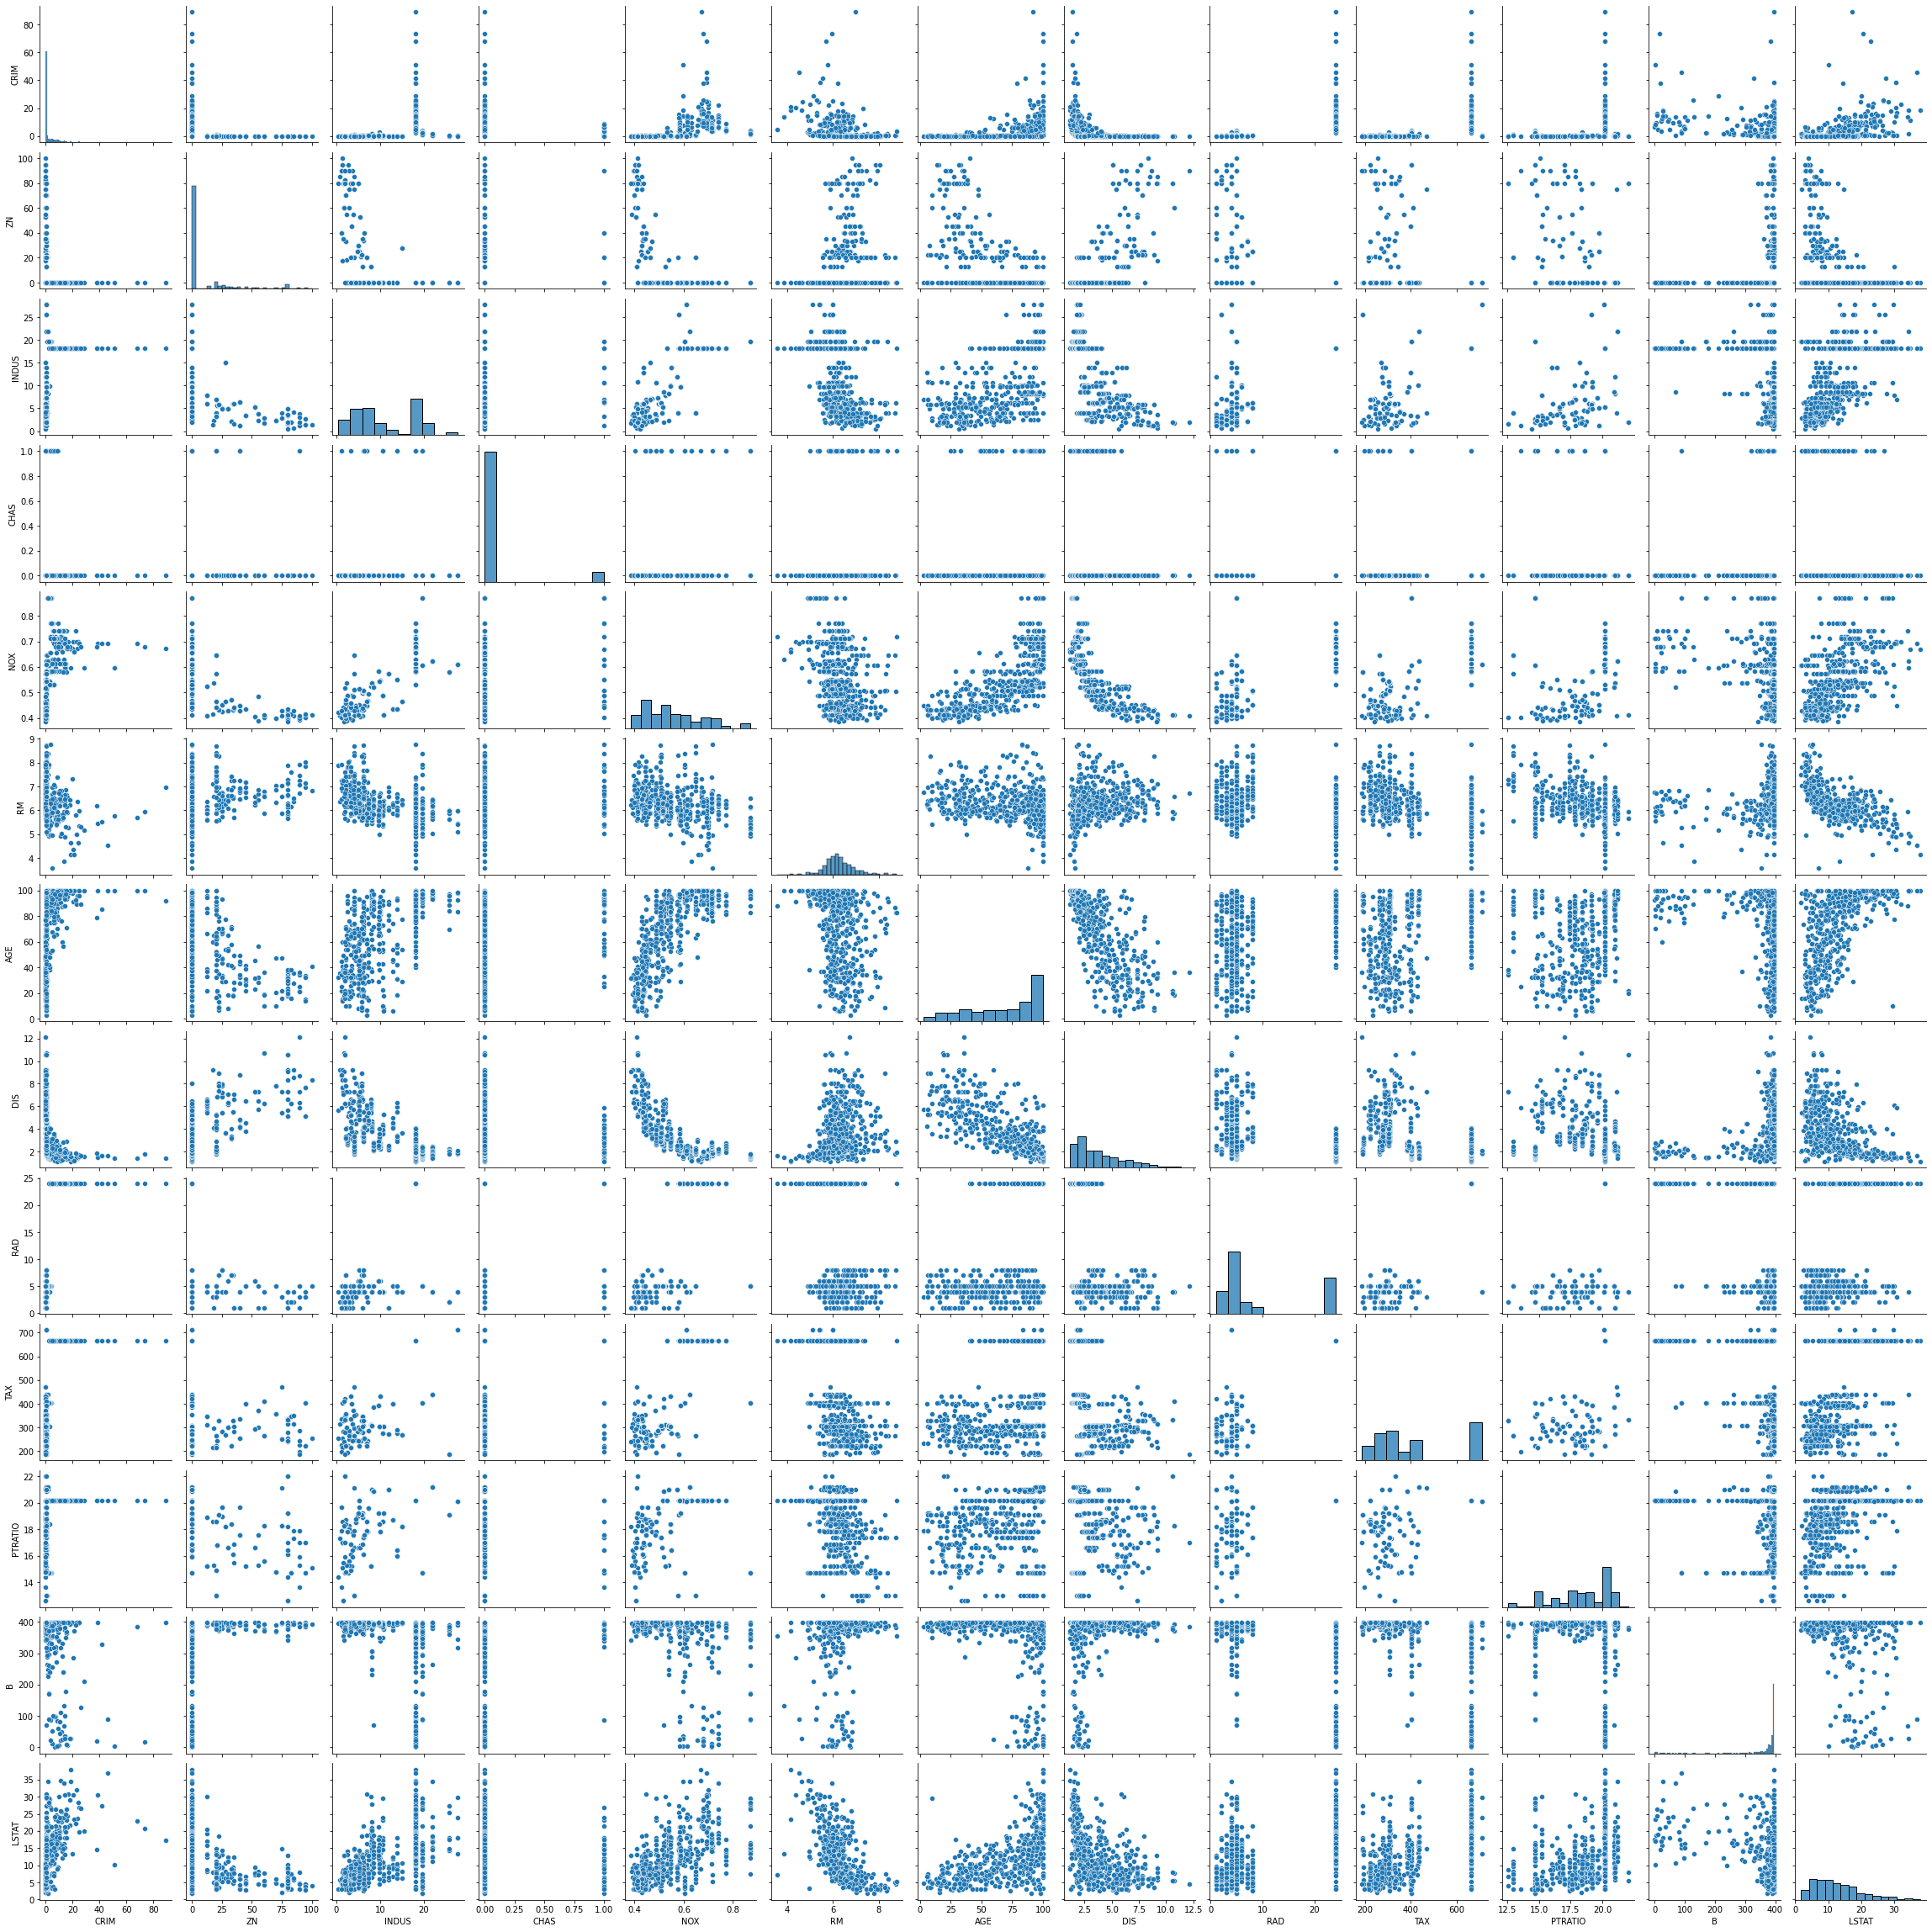

In [103]:
import seaborn as sns
sns.pairplot(X)

## titanic데이터를 가지고 생존율을 예측하는 의사결정나무 모델을 만들고 결과를 해석하세요 

In [33]:
df_t = pd.read_csv("./data/titanic.csv")
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg


In [34]:
y=df_t['survived']
X=df_t.drop(columns=['survived','pclass','embarked'], axis=1)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   adult_male   891 non-null    bool   
 7   embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 49.7+ KB


In [ ]:
# 결측치 처리
# age는 평균값 반올림, embark_town은 최빈값 대체

In [40]:
X['embark_town'].fillna(X['embark_town'].describe().top, inplace=True)
X['age'].fillna(round(X['age'].mean()), inplace=True)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          891 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   adult_male   891 non-null    bool   
 7   embark_town  891 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 49.7+ KB


In [42]:
X

,sex,age,sibsp,parch,fare,class,adult_male,embark_town
0,male,22.0,1,0,7.2500,Third,True,Southampton
1,female,38.0,1,0,71.2833,First,False,Cherbourg
2,female,26.0,0,0,7.9250,Third,False,Southampton
3,female,35.0,1,0,53.1000,First,False,Southampton
4,male,35.0,0,0,8.0500,Third,True,Southampton
...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,True,Southampton
887,female,19.0,0,0,30.0000,First,False,Southampton
888,female,30.0,1,2,23.4500,Third,False,Southampton
889,male,26.0,0,0,30.0000,First,True,Cherbourg


In [43]:
X = pd.get_dummies(columns=['sex','class','adult_male','embark_town'], data = X)

In [44]:
from sklearn.model_selection import train_test_split

# 훈련셋, 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

In [45]:

from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 모델링
dt_clf = DecisionTreeClassifier()

## 모델 학습 
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [46]:
print('train_score:',dt_clf.score(X_train,y_train))
print('test_score:',dt_clf.score(X_test,y_test))

train_score: 0.9823434991974318
test_score: 0.7611940298507462


In [47]:
dt_clf.get_depth()

15

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(2,16,1) , 'min_samples_leaf':range(1,20,1)}
model_grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
model_grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 16),
                         'min_samples_leaf': range(1, 20)})

In [49]:
model_grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=5)

In [63]:
model_grid_tree.best_score_

0.8347354838709677

In [64]:
model_grid_tree.score(X_train,y_train)

0.8860353130016051

In [65]:
model_grid_tree.score(X_test,y_test)

0.7835820895522388

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, precision_score, f1_score, recall_score

y_pred = model_grid_tree.predict(X_test)
confusion_matrix(y_test,y_pred)


array([[143,  22],
       [ 36,  67]])

In [67]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.7528089887640449
0.6504854368932039
0.6979166666666666


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       165
           1       0.75      0.65      0.70       103

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



In [69]:
y.value_counts()

0    549
1    342
Name: survived, dtype: int64

/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


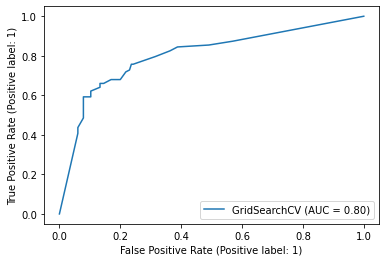

In [70]:
plot_roc_curve(model_grid_tree, X_test,y_test)

In [71]:
roc_auc_score(y_test,model_grid_tree.predict_proba(X_test)[:,1])

0.8044130626654897

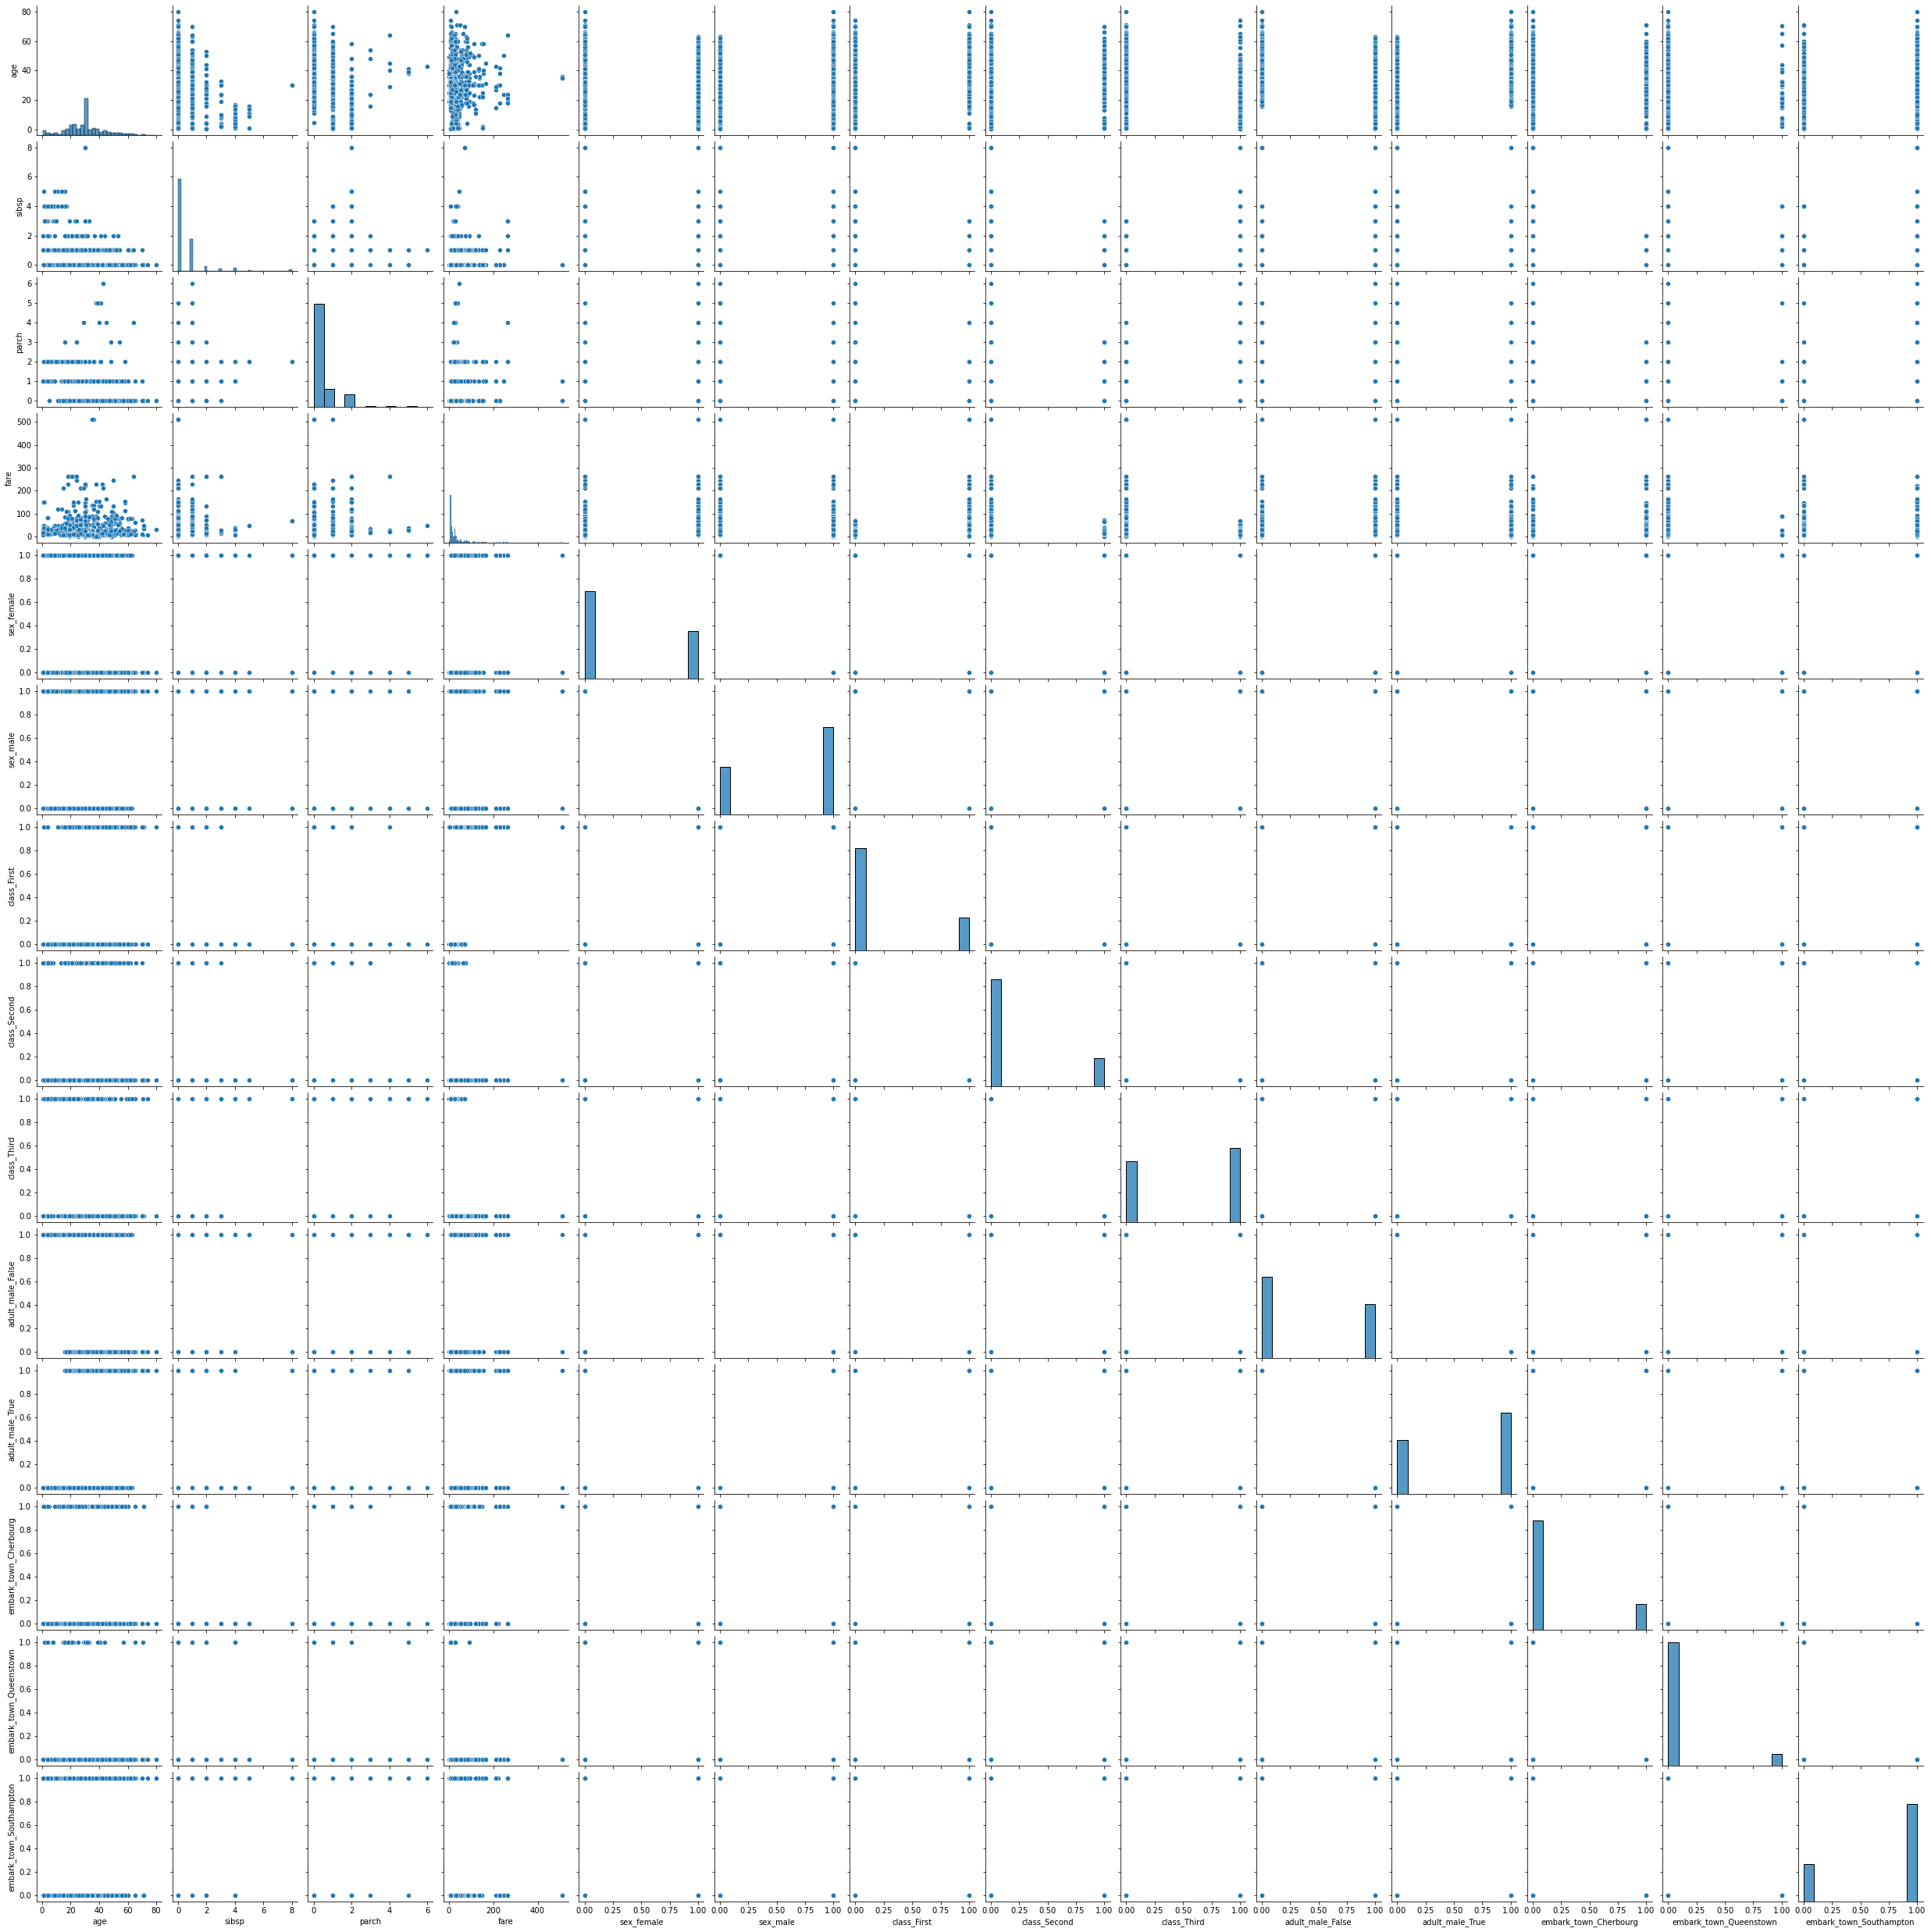

In [73]:
import seaborn as sns
sns.pairplot(X)

## 해석
- 의사결정 나무 (분류) 최적 매개변수는 max_depth=9, min_samples_leaf=5  
- train_best_score: 0.8347354838709677  
- test_score: 0.7835820895522388
- train 데이터에 대해 다소 과적합된 부분이 있지만, test 데이터에 대해 준수하게 적합되었다고 할 수 있다.
- auc_roc_score: 0.8044130626654897 로 보통임
- y값이 0인 데이터에 대해 정확도, 민감도, f1 score가 y=1에 비해 약간 높은 경향이 있는데 이는 y의 데이터가 완전한 균형을 이루고 있지 않아 차이점이 있다고 볼수 있다.
- 종속변수 중, age를 제외하고 수치형 데이터는 정규분포를 띄지않고 있고, 범주형 변수는 불균형이 보이는데 이를 해소하면 의사결정나무 분류 모델의 성능이 좋아질 수도 있을 듯